<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Ames_house_pricing_analysis_step_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

import seaborn as sns

Mounted at /content/drive


In [3]:
!pip install sweetviz

In [4]:
import sweetviz as sw


# **Subrutinok**

In [5]:
def checkvalues(columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")

In [6]:
def createcolumn(columnname,keys):
    for key in keys:
        df[keys[key]]=0.0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1.0

# **Adattisztítás**

In [7]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

#correlationMAt=df.corr()
#print(correlationMAt)

In [8]:
a=set(df["Neighborhood"])
#print(a)
#df.mean()
salePrice_by_Neighborhood=df.groupby("Neighborhood")[["SalePrice"]].describe()
#print(salePrice_by_Neighborhood)

#print(salePrice_by_Neighborhood[("SalePrice","mean")])
salePrice_by_Neighborhood.columns=salePrice_by_Neighborhood.columns.droplevel(0)
#print(salePrice_by_Neighborhood.columns)
dfs=salePrice_by_Neighborhood["mean"]
#print(dfs)
dfs2=dfs.sort_values(0)
#print(dfs2)
dfs2_enum=dfs2.index
rangsor={i:index for index,i in enumerate(dfs2_enum)}
print(rangsor)

{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}


**És megvan a kerületek rangsora... :-)**

# **Tegyük bele a Dataframe-be **

In [9]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

for neigh_name in rangsor:
    df[neigh_name]=0.0
for neigh_name in rangsor:
    print(neigh_name)
    for i in df.index:
        if df.at[i,"Neighborhood"]==neigh_name:
            df.at[i,neigh_name]=1
            
#print(df["Neighborhood"])  kiírjuk, hogy számok lettek -e

MeadowV
IDOTRR
BrDale
BrkSide
Edwards
OldTown
Sawyer
Blueste
SWISU
NPkVill
NAmes
Mitchel
SawyerW
NWAmes
Gilbert
Blmngtn
CollgCr
Crawfor
ClearCr
Somerst
Veenker
Timber
StoneBr
NridgHt
NoRidge


In [10]:
#df.head()

# Adattisztítás: **KitchenQual**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor




In [11]:
keys={"Ex":"KitchenQual_Ex", "Gd":"KitchenQual_Gd", "TA":"KitchenQual_Ta","Fa":"KitchenQual_Fa","Po":"KitchenQual_Po"}
idx="KitchenQual"
checkvalues(idx,keys)
#print(df[idx])
createcolumn(idx,keys)

KitchenQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Street**: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [12]:
key={"Grvl":"Street_Grvl", "Pave":"Street_Pave"}
columnname="Street"
checkvalues(columnname,key)
createcolumn(columnname,key)

Street ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Alley**: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [13]:
key={"Grvl":"Alley_Grvl", "Pave":"Alley_Pave", "Na":"Alley_NA", np.nan:"Alley_NAN"}
columnname="Alley"
checkvalues(columnname,key)
createcolumn(columnname,key)

Alley ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Adattisztítás: **ExterQual**
* Ex Excellent
* Gd Good
* TA Typical/Average
* Fa Fair
* Po Poor

In [14]:



key={"Ex":"ExterQual_Ex", "Gd":"ExterQual_Gd", "TA":"ExterQual_TA","Fa":"ExterQual_Fa","Po":"ExterQual_Po"}
columnname="ExterQual"
checkvalues(columnname,key)

ExterQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [15]:
createcolumn(columnname,key)

# **BsmtQual: Evaluates the height of the basement**

* Ex	Excellent (100+ inches)	
* Gd	Good (90-99 inches)
* TA	Typical (80-89 inches)
* Fa	Fair (70-79 inches)
* Po	Poor (<70 inches
* NA	No Basement

In [16]:
key={"Ex":"BsmtQual_Ex", "Gd":"BsmtQual_Gd", "TA":"BsmtQual_TA","Fa":"BsmtQual_Fa","Po":"BsmtQual_Po","NA":"BsmtQual_NA", np.nan:"BsmtQual_Nan" }
idx="BsmtQual"
checkvalues(idx,key)

BsmtQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [17]:
createcolumn(idx,key)

# Adattisztítás: **FireplaceQu**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor
* No Fireplace


In [18]:
key={"Ex":"FireplaceQu_Ex", "Gd":"FireplaceQu_Gd", "TA":"FireplaceQu_TA","Fa":"FireplaceQu_Fa","Po":"FireplaceQu_Po", "No":"FireplaceQu_No", np.nan:"FireplaceQu_Nan"}
idx="FireplaceQu"
checkvalues(idx,key)
createcolumn(idx,key)

FireplaceQu ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Foundation: Type of foundation**
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [19]:
key={"BrkTil":"Foundation_BrkTil", "CBlock":"Foundation_CBlock","PConc":"Foundation_PConc","Slab":"Foundation_Slab","Stone":"Foundation_Stone", "Wood":"Foundation_"}
col="Foundation"
checkvalues(col,key)
createcolumn(col,key)

Foundation ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **GarageQual: Garage quality**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [20]:

key={"Ex":"GarageQual_Ex", "Gd":"GarageQual_Gd", "TA":"GarageQual_TA","Fa":"GarageQual_Fa","Po":"GarageQual_Po","NA":"GarageQual_NA", np.nan:"GarageQual_Nan"}
idx="GarageQual"
checkvalues(idx,key)
createcolumn(idx,key)

GarageQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **GarageFinish: Interior finish of the garage**

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [21]:
key={"Fin":"GarageFinish_Fin","RFn":"GarageFinish_RFn","Unf":"GarageFinish_Unf","NA":"GarageFinish_NA",np.nan:"GarageFinish_Nan"}
idx="GarageFinish"
checkvalues(idx,key)
createcolumn(idx,key)

GarageFinish ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [22]:
key={"Ex":"BsmtCond_Ex","Gd":"BsmtCond_Gd","TA":"BsmtCond_TA","Fa":"BsmtCond_Fa" ,"Po":"BsmtCond_Po",np.nan:"BsmtCond_NA"}
idx="BsmtCond"
checkvalues(idx,key)
createcolumn(idx,key)

BsmtCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **ExterCond**: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [23]:
key={"Ex":"ExterCond_Ex","Gd":"ExterCond_Gd","TA":"ExterCond_TA","Fa":"ExterCond_FA" ,"Po":"ExterCond_Po"}
idx="ExterCond"
checkvalues(idx,key)
createcolumn(idx,key)

ExterCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Heating**: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [24]:
key={"Floor":"Heating_Floor","GasA":"Heating_GasA","GasW":"Heating_GasW","Grav":"Heating_Grav" ,"OthW":"Heating_OthW","Wall":"Heating_Wall"}
idx="Heating"
checkvalues(idx,key)
createcolumn(idx,key)

Heating ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **HeatingQC**: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [25]:
key={"Ex":"HeatingQC_Ex","Gd":"HeatingQC_Gd","TA":"HeatingQC_TA","Fa":"HeatingQC_FA" ,"Po":"HeatingQC_Po"}
idx="HeatingQC"
checkvalues(idx,key)
createcolumn(idx,key)

HeatingQC ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **CentralAir**: Central air conditioning

       N	No
       Y	Yes

In [26]:
key={"N":"CentralAir_N","Y":"CentralAir_Y"}
idx="CentralAir"
checkvalues(idx,key)
createcolumn(idx,key)

CentralAir ellenőrzése !

1460 mintából 0 db nem volt megfelelő



# **Functional**: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

In [27]:
key={"Typ":"Functional_Typ","Min1":"Functional_Min1","Min2":"Functional_Min2","Mod":"Functional_Mod" ,"Maj1":"Functional_Maj1","Maj2":"Functional_Maj2","Sev":"Functional_Sev","Sal":"Functional_Sal"}
idx="Functional"
checkvalues(idx,key)
createcolumn(idx,key)

Functional ellenőrzése !

1460 mintából 0 db nem volt megfelelő


                       Id  MSSubClass  ...  Functional_Sev  Functional_Sal
Id               1.000000    0.011156  ...       -0.003944             NaN
MSSubClass       0.011156    1.000000  ...        0.001921             NaN
LotFrontage     -0.010601   -0.386347  ...             NaN             NaN
LotArea         -0.033226   -0.139781  ...        0.020815             NaN
OverallQual     -0.028365    0.032628  ...       -0.001881             NaN
...                   ...         ...  ...             ...             ...
Functional_Mod  -0.014029    0.004263  ...       -0.002667             NaN
Functional_Maj1  0.007304    0.058745  ...       -0.002576             NaN
Functional_Maj2 -0.012754   -0.034515  ...       -0.001535             NaN
Functional_Sev  -0.003944    0.001921  ...        1.000000             NaN
Functional_Sal        NaN         NaN  ...             NaN             NaN

[143 rows x 143 columns]


<Figure size 720x720 with 0 Axes>

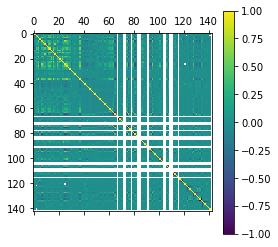

In [33]:
ndb=14
correlacio=df.corr()
print(correlacio)
plt.figure(figsize=(10,10))

plt.matshow(correlacio)
plt.colorbar()
plt.show()
cordl=correlacio.nlargest(ndb,"SalePrice")
cords=correlacio.nsmallest(ndb,"SalePrice")


In [34]:
l1=list(cordl["SalePrice"].index)
print(l1)


['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc']


In [35]:
l2=list(cords["SalePrice"].index)
nlarge=list((l1+l2[1:]))

print(nlarge)
print(len(nlarge))





['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'OldTown', 'NAmes', 'Edwards', 'IDOTRR', 'KitchenQual_Fa', 'BrkSide']
27


In [36]:
df_minimal=df[nlarge]

#df=(df_minimal-df_minimal.min())/(df_minimal.max()-df_minimal.min())

df.replace(-np.inf,np.nan)
df.replace(np.inf,np.nan)
df.dropna()


X=df[nlarge[1:]]
#X=X.values.astype(np.float)
print(X.columns)
print(type(X))
Y=df[nlarge[0:1]]

print(Y.columns)
print(type(Y))



Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc', 'KitchenQual_Ta',
       'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'HeatingQC_TA',
       'CentralAir_N', 'Foundation_BrkTil', 'OldTown', 'NAmes', 'Edwards',
       'IDOTRR', 'KitchenQual_Fa', 'BrkSide'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['SalePrice'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [37]:
len(df.columns)
 

186

In [38]:
print(type(df))
print(nlarge)

df["SalePrice"]
df.columns

<class 'pandas.core.frame.DataFrame'>
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc', 'KitchenQual_Ta', 'BsmtQual_TA', 'GarageFinish_Unf', 'Foundation_CBlock', 'HeatingQC_TA', 'CentralAir_N', 'Foundation_BrkTil', 'OldTown', 'NAmes', 'Edwards', 'IDOTRR', 'KitchenQual_Fa', 'BrkSide']


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'CentralAir_N', 'CentralAir_Y', 'Functional_Typ', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Maj1',
       'Functional_Maj2', 'Functional_Sev', 'Functional_Sal'],
      dtype='object', length=186)

In [39]:
print(df)

sns.set()
print(df.head())
#sns.pairplot(df[nlarge[0:15]])
#plt.show()
Y

        Id  MSSubClass MSZoning  ...  Functional_Maj2  Functional_Sev Functional_Sal
0        1          60       RL  ...              0.0             0.0            0.0
1        2          20       RL  ...              0.0             0.0            0.0
2        3          60       RL  ...              0.0             0.0            0.0
3        4          70       RL  ...              0.0             0.0            0.0
4        5          60       RL  ...              0.0             0.0            0.0
...    ...         ...      ...  ...              ...             ...            ...
1455  1456          60       RL  ...              0.0             0.0            0.0
1456  1457          20       RL  ...              0.0             0.0            0.0
1457  1458          70       RL  ...              0.0             0.0            0.0
1458  1459          20       RL  ...              0.0             0.0            0.0
1459  1460          20       RL  ...              0.0            

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [40]:
from sklearn import datasets, linear_model

print(df.describe())

alpha=0.0001


print(X)
print(Y)
for i in nlarge[0:0]:
    print(i,Y[i].sum())
print(df[["SalePrice"]])




lreg = linear_model.Ridge()  
lreg.fit(X,Y)
lreg_pred = lreg.predict(X)

                Id   MSSubClass  ...  Functional_Sev  Functional_Sal
count  1460.000000  1460.000000  ...     1460.000000          1460.0
mean    730.500000    56.897260  ...        0.000685             0.0
std     421.610009    42.300571  ...        0.026171             0.0
min       1.000000    20.000000  ...        0.000000             0.0
25%     365.750000    20.000000  ...        0.000000             0.0
50%     730.500000    50.000000  ...        0.000000             0.0
75%    1095.250000    70.000000  ...        0.000000             0.0
max    1460.000000   190.000000  ...        1.000000             0.0

[8 rows x 143 columns]
      OverallQual  GrLivArea  GarageCars  ...  IDOTRR  KitchenQual_Fa  BrkSide
0               7       1710           2  ...     0.0             0.0      0.0
1               6       1262           2  ...     0.0             0.0      0.0
2               7       1786           2  ...     0.0             0.0      0.0
3               7       1717           

In [41]:
Y.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [51]:
 delta_list=[]
import seaborn as sns
h=len(df["SalePrice"])
print(h)
sns.set()
for i in range(h):
    print(i)
    deltapercent=(df.iloc[i,0]-lreg_pred[i])/df.iloc[i,0]*100
    delta_list.append(deltapercent)
        #print(f" {i} --> {df_norm.iloc[i,1]:0.0f} --> {df_norm.iloc[i,1]-lasso_pred[i]:0.0f} --> {deltapercent:0.1f}")

        
sns.histplot(data=delta_list,color="green");
plt.xlabel="eltérés"
a=pd.Series(delta_list)
print(endofparam,a.describe())


1460
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f985758a9d8> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f98572aff28> (for post_execute):


KeyboardInterrupt: ignored